In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
data = pd.read_csv('hul.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [8]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']
target = 'Close'

In [9]:
sequence_length = 100

In [10]:
X = []
y = []

for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i+sequence_length].values)
    y.append(data[target].iloc[i+sequence_length])

In [11]:
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [12]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y)

In [22]:
X_train = X_scaled[:int(0.8*len(X))]
X_test = X_scaled[int(0.8*len(X)):]
y_train = y_scaled[:int(0.8*len(y))]
y_test = y_scaled[int(0.8*len(y)):]


In [23]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

c:\Users\ghrua\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - loss: 0.0035 - val_loss: 0.0539
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - loss: 0.0012 - val_loss: 0.0166
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - loss: 6.1923e-04 - val_loss: 0.0043
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 3.2238e-04 - val_loss: 0.0085
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - loss: 1.8392e-04 - val_loss: 0.0131
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 1.8256e-04 - val_loss: 0.0093
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - loss: 1.5268e-04 - val_loss: 0.0079
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - loss: 1.4505e-04 - val_loss: 0.0062
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 1.4919e-04 - val_loss: 0.0057
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - loss: 1.3655e-04 - val_loss: 0.0062
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - loss: 1.5299e-04 - val_loss: 0.0049
Epoch 12/50
36

In [27]:
y_test_pred_scaled = model.predict(X_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_scaled)

222/222 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step


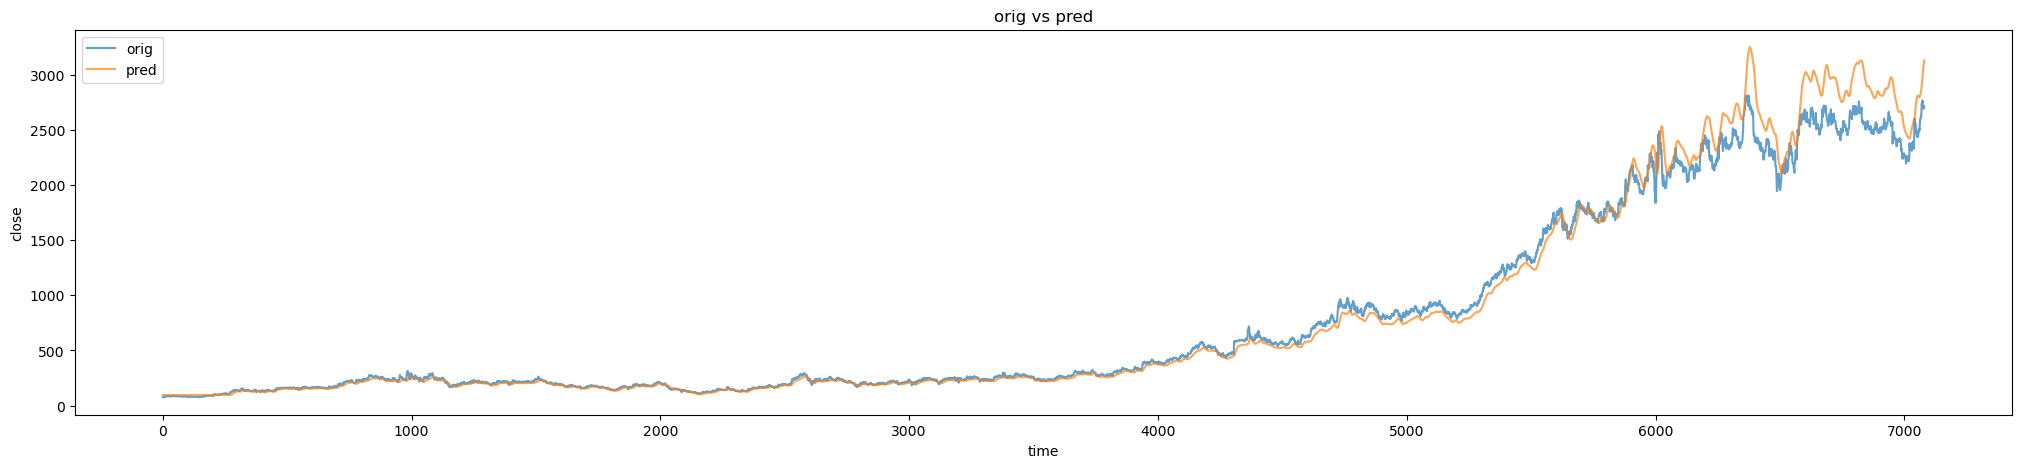

In [28]:
plt.figure(figsize=(25, 5))
plt.plot(y_test_actual, label='orig', alpha=0.7)
plt.plot(y_test_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('time')
plt.ylabel('close')
plt.legend()
plt.show()

In [29]:
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


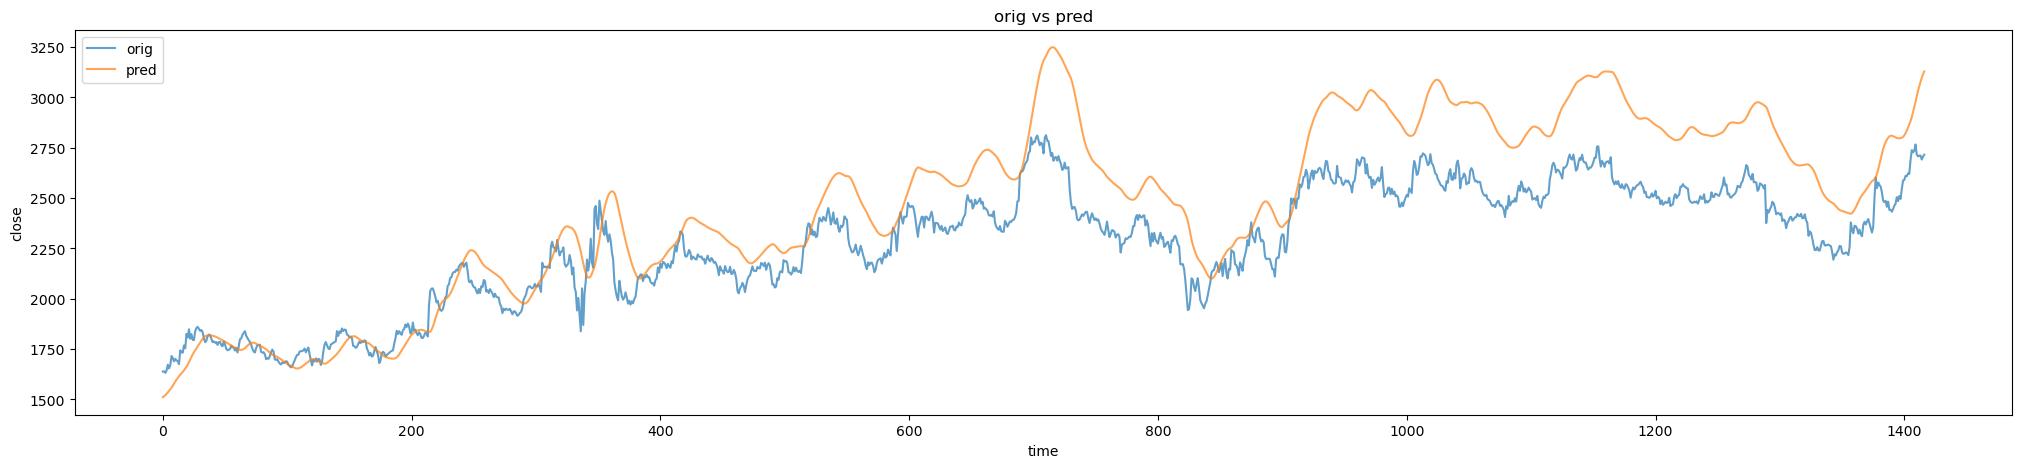

In [30]:
plt.figure(figsize=(25, 5))
plt.plot(y_test_actual, label='orig', alpha=0.7)
plt.plot(y_test_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('time')
plt.ylabel('close')
plt.legend()
plt.show()

In [31]:
y_scaled.size

7081